Initial shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embar

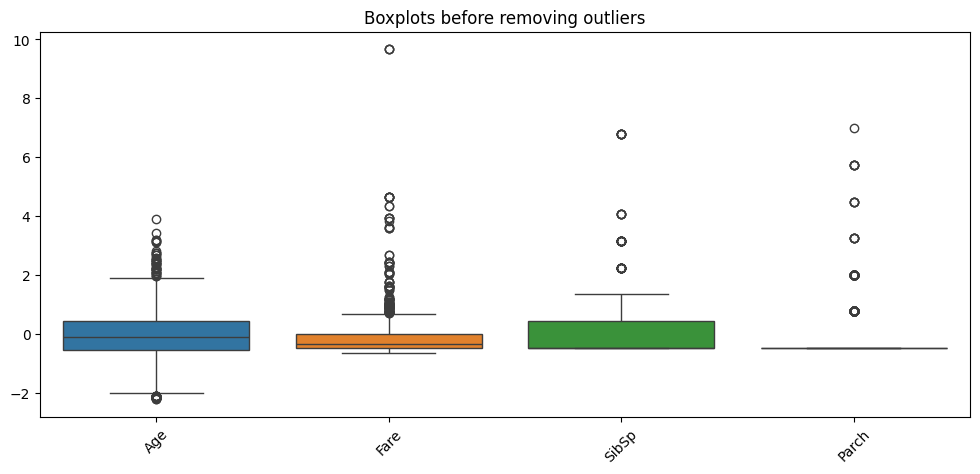


Final cleaned shape: (577, 12)
✅ Preprocessing complete!


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load Dataset

df = pd.read_csv('Titanic-Dataset.csv')
print("Initial shape:", df.shape)
df.head()

# 2. Explore info and nulls

print(df.info())
print(df.isnull().sum())

# 3. Handle Missing Values

# Fill Age with Median

df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill Embarked with most common value

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Drop Cabin because too many nulls

df = df.drop(columns=['Cabin'])

print("\nAfter imputation:\n", df.isnull().sum())

# 4. Encode Categorical variables

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())

# 5. Normalize Numerical Columns

scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

# 6. Visualize Outliers and Remove
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots before removing outliers')
plt.xticks(rotation=45)
plt.show()

# Removing outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nFinal cleaned shape:", df.shape)

# Save cleaned data
df.to_csv('Titanic_Cleaned.csv', index=False)
print("✅ Preprocessing complete!")
